In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pykalman import KalmanFilter


[*********************100%%**********************]  1 of 1 completed
C:\Users\ayman\AppData\Local\Temp\ipykernel_15076\1425503545.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][1:] = np.where(data['Close'].iloc[1:].value

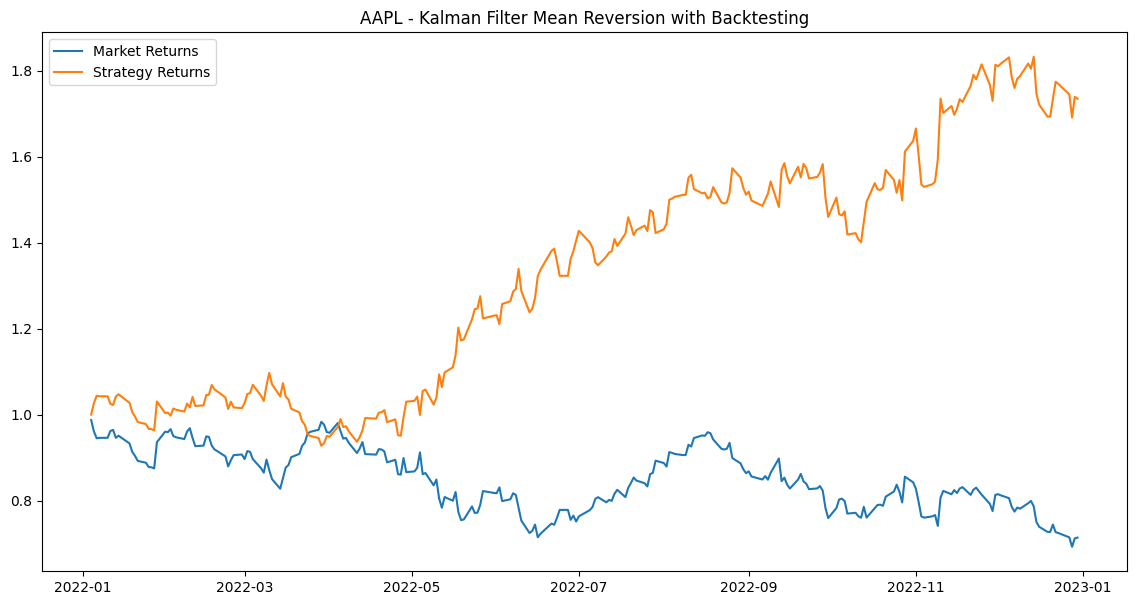

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Define Kalman Filter for estimating the mean
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Observation is the closing price
obs = data['Close'].values

# Apply the Kalman Filter
state_means, _ = kf.filter(obs)

# Add the state means to the dataframe
data['Kalman_Filter'] = state_means

# Generate trading signals
data['Signal'] = 0
data['Signal'][1:] = np.where(data['Close'].iloc[1:].values > data['Kalman_Filter'][:-1], -1, 1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} - Kalman Filter Mean Reversion with Backtesting')
plt.legend()
plt.show()
